In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

### Описание, чтение

In [5]:
data_raw = pd.read_csv('adult.csv')

In [6]:
type(data_raw)

pandas.core.frame.DataFrame

Таблица содержит данные о более 32 тысяч людей с указанием их дохода за один год, основываясь на данных перепеси населения. Для каждого человека указаны возраст, рабочий класс, образование, семейное положение, род деятельности, отношения, раса, пол, прирост капитала, потеря капитала, количество рабочих часов в неделю, родная страна, доход.

Вначале посмотрим на размеры таблицы-количество строк (каждая строка соответсвует одному человеку) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [7]:
data_raw.shape

(32561, 15)

In [8]:
data_raw.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
data_raw.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
data_raw

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Мы видим, что столбцы (признаки) имеют имена 
- `age` - возраст 
- `workclass` - рабочий класс
- `fnlwgt`- The # of people the census takers believe that observation represents (final weight)
- `education` - образование
- `education.num` - количество классов
- `marital.status` - семейное положение
- `occupation` - род деятельности
- `relationship` - отношения
- `race` - раса
- `sex` - пол
- `capital.gain` - прирост капитала
- `capital.loss` - потеря капитала
- `hours.per.week` - количество рабочих часов в неделю
- `native.country` - родная страна
- `income` - доход (в тыс. руб.)

Признаки `workclass`, `education`, `marital.status`, `occupation`, `relationship`, `race`, `native.country` - номинальный (категориальный), `sex`, `income` - бинарный, остальные признаки - количественные (числовые). 

Требуется классифицировать людей по их доходу(больше 50к, меньше 50к). Это *задача классификации*.

### Визуализация данных

In [11]:
print(data_raw.shape)
print(data_raw.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [12]:
data_raw.index

RangeIndex(start=0, stop=32561, step=1)

In [13]:
data_raw.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Построим попарные матрицы разброса:

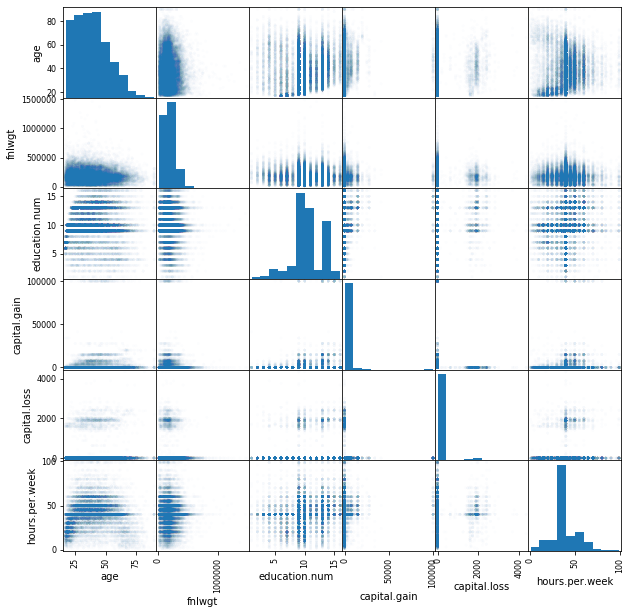

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

Зависимостей между признаками нет.

Можно вычислить матрицу корреляции для количественных признаков. Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции.

In [16]:
data_raw.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Коллинеарными называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели. Сильно коррелированные друг с другом переменные дают модели одну и ту же информацию, следовательно, для анализа не нужно использовать их все.

Построим диаграмму рассеивания:

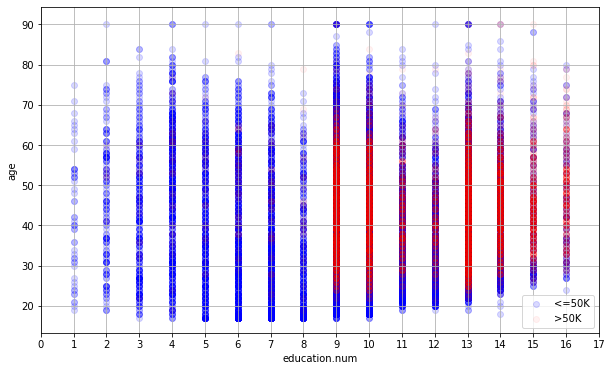

In [17]:
plt.figure(figsize = (10, 6))

plt.scatter(data_raw[data_raw['income'] == '<=50K']['education.num'],
            data_raw[data_raw['income'] == '<=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(data_raw[data_raw['income'] == '>50K']['education.num'],
            data_raw[data_raw['income'] == '>50K']['age'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('education.num')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('age')
plt.legend()
plt.grid()

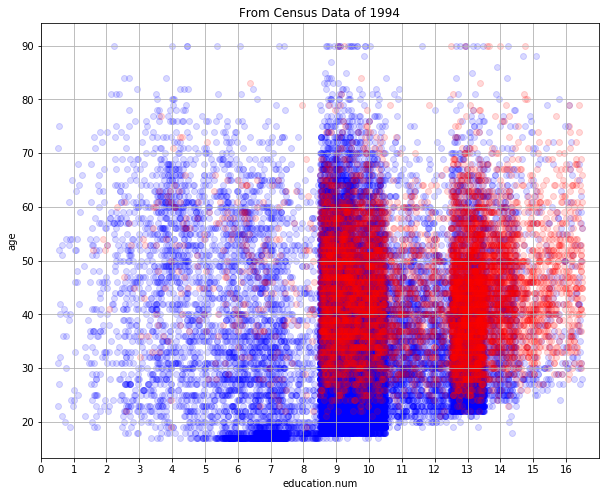

In [18]:
np.random.seed(0)
education_num_rnd = data_raw['education.num'] + np.random.rand(data_raw.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data_raw['income'] == '<=50K'],
            data_raw[data_raw['income'] == '<=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(education_num_rnd[data_raw['income'] == '>50K'],
            data_raw[data_raw['income'] == '>50K']['age'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.xlabel('education.num')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('age')
plt.title('From Census Data of 1994')
plt.grid()

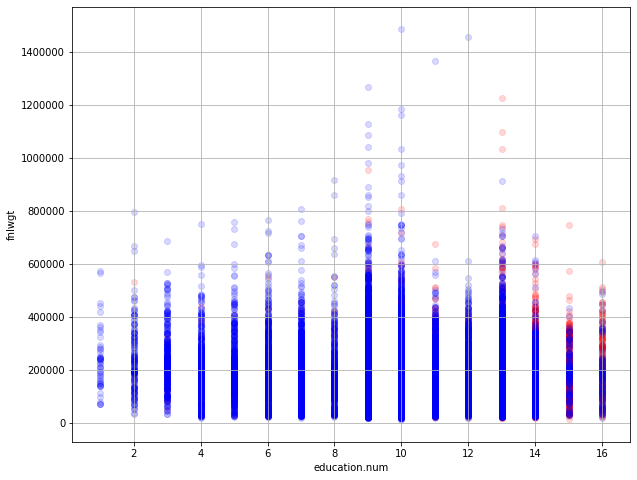

In [19]:
plt.figure(figsize = (10, 8))

plt.scatter(data_raw[data_raw['income'] == '>50K']['education.num'],
            data_raw[data_raw['income'] == '>50K']['fnlwgt'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.scatter(data_raw[data_raw['income'] == '<=50K']['education.num'],
            data_raw[data_raw['income'] == '<=50K']['fnlwgt'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.xlabel('education.num')
plt.ylabel('fnlwgt')
plt.grid()

Наибольший доход получают люди, закончившие от 9-ти классов. Возраст не влияет, хороший доход имеют как 20-летние, так и пожилые люди.

### Обработка категориальных признаков

In [20]:
data_raw['workclass'].dtype.name

'object'

In [21]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [22]:
for c in categorical_columns:
    print(c, data_raw[c].unique())

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex ['Female' 'Male']
native.country ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' '

### Обработка пропущенных значений

In [23]:
data_raw.median(axis = 0)

age                   37.0
fnlwgt            178356.0
education.num         10.0
capital.gain           0.0
capital.loss           0.0
hours.per.week        40.0
dtype: float64

Данных, с которыми мы работаем мало. Разумно заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков)

In [24]:
data_raw = data_raw.fillna(data_raw.median(axis = 0), axis = 0)

In [25]:
data_raw[numerical_columns].count(axis = 0)

age               32561
fnlwgt            32561
education.num     32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
dtype: int64

In [26]:
data_raw['workclass'].describe()

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

In [27]:
data_raw.loc[data_raw.workclass == "?", 'workclass'] = None

In [28]:
data_raw.describe(include = [object])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [29]:
type(data_raw['workclass'].describe())

pandas.core.series.Series

In [30]:
data_raw['workclass'].describe().top

'Private'

In [31]:
data_raw['workclass'] = data_raw['workclass'].fillna('Private')

In [32]:
data_raw.describe(include = [object])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4140,13193,27816,21790,29170,24720


In [33]:
data_describe = data_raw.describe(include = [object])
for c in categorical_columns:
    data_raw[c] = data_raw[c].fillna(data_describe[c]['top'])

In [34]:
data_raw.describe(include = [object])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4140,13193,27816,21790,29170,24720


### Векторизация


In [35]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'income'] ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']


In [36]:
data_raw['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
data_raw.at[data_raw['sex'] == 'Male', 'sex'] = 0
data_raw.at[data_raw['sex'] == 'Female', 'sex'] = 1
data_raw['sex'].describe()

count    32561.000000
mean         0.330795
std          0.470506
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

In [38]:
data_raw['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

Заменим признак race 5 признаками: race_White, race_Black, ..., race_Other.

Если признак race принимает значение White, то признак race_White равен 1, а все остальные равны 0.
Если признак race принимает значение Black, то признак race_Black равен 1, а все остальные равны 0.
и т.д.

In [39]:
data_raw[nonbinary_columns]

,workclass,education,marital.status,occupation,relationship,race,native.country
0,Private,HS-grad,Widowed,?,Not-in-family,White,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,United-States
2,Private,Some-college,Widowed,?,Unmarried,Black,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,United-States
...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,United-States
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States


In [40]:
data_nonbinary = pd.get_dummies(data_raw[nonbinary_columns])
print(data_nonbinary.columns)

Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',


In [41]:
len(data_nonbinary.columns)

99

### Нормализация количественных признаков

каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [42]:
data_numerical = data_raw[numerical_columns]
data_numerical.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [43]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [44]:
data_numerical.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,1.526373e-16,-8.107090e-17,-1.154839e-14,-6.458148e-14,4.464363e-14,-4.106362e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.582182e+00,-1.681605e+00,-3.529602e+00,-1.459182e-01,-2.166562e-01,-3.193981e+00
25%,-7.757560e-01,-6.816805e-01,-4.200532e-01,-1.459182e-01,-2.166562e-01,-3.542890e-02
50%,-1.159528e-01,-1.082176e-01,-3.135955e-02,-1.459182e-01,-2.166562e-01,-3.542890e-02
75%,6.904732e-01,4.478697e-01,7.460277e-01,-1.459182e-01,-2.166562e-01,3.695137e-01
max,3.769554e+00,1.226837e+01,2.300802e+00,1.339437e+01,1.059334e+01,4.742894e+00


### Соединяем все в одну таблицу


In [45]:
data_raw = pd.concat((data_numerical, data_nonbinary, data_raw[binary_columns]), axis = 1)
print(data_raw.shape)
#print data.columns

(32561, 107)


In [46]:
data_raw.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,1.526373e-16,-8.107090e-17,-1.154839e-14,-6.458148e-14,4.464363e-14,-4.106362e-15,0.029483,0.064279,0.000215,0.753417,...,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895857,0.002058,0.000491,0.330795
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.169159,0.245254,0.014661,0.431029,...,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.305451,0.045316,0.022162,0.470506
min,-1.582182e+00,-1.681605e+00,-3.529602e+00,-1.459182e-01,-2.166562e-01,-3.193981e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.757560e-01,-6.816805e-01,-4.200532e-01,-1.459182e-01,-2.166562e-01,-3.542890e-02,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-1.159528e-01,-1.082176e-01,-3.135955e-02,-1.459182e-01,-2.166562e-01,-3.542890e-02,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.904732e-01,4.478697e-01,7.460277e-01,-1.459182e-01,-2.166562e-01,3.695137e-01,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.769554e+00,1.226837e+01,2.300802e+00,1.339437e+01,1.059334e+01,4.742894e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pешение задачи классификации

### X и y

In [47]:
X = data_raw.drop('income', axis = 1) # выбрасываем столбец 'income'
y = data_raw['income']
feature_names = X.columns

In [48]:
type(feature_names)

pandas.core.indexes.base.Index

In [49]:
feature_names

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native.country_Puerto-Rico', 'native.country_Scotland',
       'native.country_South', 'native.country_Taiwan',
       'native.country_Thailand', 'native.country_Trinadad&Tobago',
       'native.country_United-States', 'native.country_Vietnam',
       'native.country_Yugoslavia', 'sex'],
      dtype='object', length=106)

In [50]:
X = X.to_numpy()

In [51]:
y = np.array(y != '<=50K', dtype='int')

In [52]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
print(X.shape)
print(y.shape)
N, d = X.shape

(32561, 106)
(32561,)


In [54]:
type(X)

numpy.ndarray

In [55]:
type(y)

numpy.ndarray

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

22792 9769


### $k$NN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [58]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [59]:
y_test_predict = knn.predict(X_test)

In [60]:
err_test = 1 - knn.score(X_test, y_test)

In [61]:
err_test

0.16091718702016589

In [62]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[6928  501]
 [1071 1269]]


In [63]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### Подбор параметров 

In [64]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.15685328185328185 20


In [65]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.14206739206739208 0.15641314361756578


Видим, что с увеличением k ошибка на тестовом наборе уменьшается, а на тренировочном увеличивается. Возможно это связано с тем, что в обучающем наборе данных больше, а значит правильно их классифицировать при такой густоте алгоритму сложнее. На тестовом же это сделать легче.

### Применить PCA и LDA для сокращения размерности пространства признаков. В каждом случае изобразить точки, сократив размерность пространства до 2

### РСА

In [68]:
# применяем метод РСА
pca_model_two = PCA(n_components = 2)
X_pca_two = pca_model_two.fit_transform(X)
X_pca_two

array([[ 3.70809282, -2.68859185],
       [ 2.61633769, -2.42028191],
       [ 2.83135705, -1.14751961],
       ...,
       [ 0.12458274, -0.82692467],
       [ 0.17088069, -1.30239697],
       [-2.1212048 ,  0.42696417]])

In [69]:
print("Главные компоненты (по строкам):")
print(pca_model_two.components_)
print("Дисперсии по главным компонентам:")
print(pca_model_two.explained_variance_)
print("Среднеквадратические отклонения:")
print(np.sqrt(pca_model_two.explained_variance_))

Главные компоненты (по строкам):
[[ 4.80839068e-01 -1.47950594e-01  4.26239635e-01  2.96621308e-01
   2.13666829e-01  4.59377918e-01  8.88950919e-03  1.82849778e-02
  -2.71184762e-04 -1.01472791e-01  2.93293242e-02  3.79256613e-02
   7.36080242e-03 -4.62986874e-05 -1.84604188e-02 -2.85526890e-02
  -8.63636970e-03 -4.28364642e-03 -7.79528280e-03 -8.48880764e-03
  -9.76474837e-03  5.51515470e-03  6.37856484e-03  8.33493336e-02
   1.70965508e-02 -4.88634792e-02  4.45873283e-02 -1.72204938e-03
   2.36965477e-02 -4.40559887e-02 -6.00325911e-04 -1.33973835e-04
   2.18835204e-01 -2.46861851e-03 -2.08683020e-01 -8.43658353e-03
   1.48731767e-03 -2.12783344e-02 -3.12616829e-02 -5.94780832e-05
   2.70968171e-03  6.57094510e-02  4.38177040e-03 -2.19416679e-02
  -1.46831872e-02 -5.91014694e-02 -3.07682568e-03  7.20825229e-02
   3.10563399e-03  2.11265411e-04  5.02139943e-04  2.70018014e-03
   2.17895865e-01 -4.00226589e-02 -1.71067962e-02 -1.39146746e-01
  -2.45525168e-02  2.93285335e-03 -1.428176

In [70]:
# создаем массив цветов в зависимости от классов
colormap = []
for j in y:
    if j == 0:
        colormap.append('red')
    else:
        colormap.append('blue')

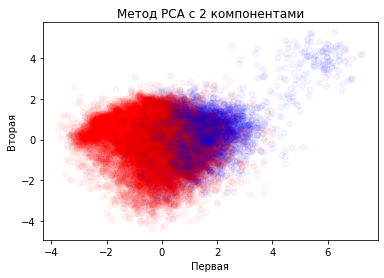

In [72]:
# отмечаем полученные методом РСА точки на графике: синим - завтра будет дождь, красным - нет
plt.scatter(X_pca_two[:, 0], X_pca_two[:, 1], c = colormap, alpha = 0.04)

# настройки графика
plt.title('Метод PCA с 2 компонентами')
plt.xlabel('Первая')
plt.ylabel('Вторая')
pass

Видим, что в полученном признаковом пространстве (после применения метода РСА) данные линейно разделимы. Метод позволяет выделить важные (те, которые имеют наибольший коэффициент главных компонент) и неважные (наименьшие коэффициенты).

#### LDA

In [73]:
# конвертируем массив object'ов в массив int'ов (fix warning)
y_new = y.astype(int)

In [74]:
# применяем метод LDA
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X, y_new)
X_lda = lda_model.transform(X)

C:\Users\Home-pc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [75]:
# делим полученные данные на тестовую и обучающие выборки
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.33, random_state = 42)

In [76]:
# обучаем классификатор knn (k = 20)
knn_optim = KNeighborsClassifier(n_neighbors = 20)
knn_optim.fit(X_train, list(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [77]:
# считаем среднюю ошибку
err_train = np.mean(y_train != knn_optim.predict(X_train))
err_test  = np.mean(y_test  != knn_optim.predict(X_test))

print(err_train, err_test)

0.149988539995416 0.16787641913270054


#### К новым данным (после PCA) применить классификатор, показавший наилучшие результаты в предыдущей лабе

In [78]:
# Применяем метод РСА к данным (кол-во компонент = 5)
pca_model_five = PCA(n_components = 5)
X_pca_five = pca_model_five.fit_transform(X)
X_pca_five.shape

(32561, 5)

In [79]:
# делим полученные данные на тестовую и обучающие выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca_five, y, test_size = 0.33, random_state = 42)

In [80]:
# обучаем классификатор knn (k = 20)
knn_optim = KNeighborsClassifier(n_neighbors = 20)
knn_optim.fit(X_train, list(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [81]:
# считаем среднюю ошибку
err_train = np.mean(y_train != knn_optim.predict(X_train))
err_test  = np.mean(y_test  != knn_optim.predict(X_test))

print(err_train, err_test)

0.14842997937199176 0.1672250139586823


#### Построить графики зависимости ошибки на тестовой и обучающей выборке в зависимости от количества используемых компонент

In [82]:
# рассматриваемые количества компонент
components_array = np.arange(1, 50, 2)
# списки для ошибок
test_err = []
train_err = []
# проверяем различные количества компонент
for components in components_array:
    # алгоритм и разделение на тестовую и обучающую выборки
    pca_model = PCA(n_components = components)
    X_pca = pca_model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = 42)
    # классификатор knn
    knn_optim = KNeighborsClassifier(n_neighbors = 20)
    knn_optim.fit(X_train, list(y_train))
    # вычисление ошибок
    train_err.append(np.mean(y_train != knn_optim.predict(X_train)))
    test_err.append(np.mean(y_test  != knn_optim.predict(X_test)))

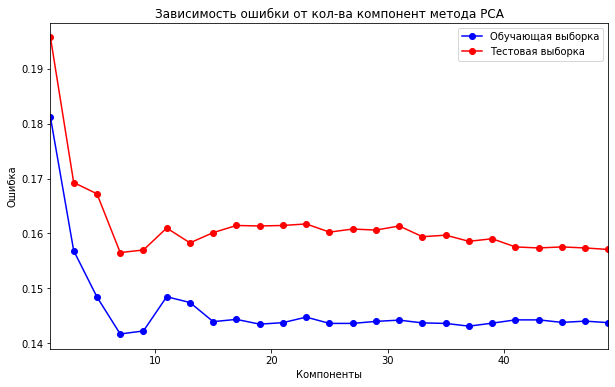

In [83]:
# построение графика зависимости ошибок от кол-ва компонент
plt.figure(figsize = (10, 6))
plt.plot(components_array, train_err, 'b-o', label = 'Обучающая выборка')
plt.plot(components_array, test_err, 'r-o', label = 'Тестовая выборка')

# настройки графика
plt.xlim([np.min(components_array), np.max(components_array)])
plt.title('Зависимость ошибки от кол-ва компонент метода РСА')
plt.xlabel('Компоненты')
plt.ylabel('Ошибка')
plt.legend()

#### Найти наилучшее значение количества используемых главных компонент

In [84]:
# оптимальное количество компонент
print("Минимальная ошибка:")
print(np.min(train_err), np.min(test_err))
print("Оптимальное количество компонент:")
print(components_array[test_err == np.min(test_err)][0])

Минимальная ошибка:
0.14169149667659867 0.15652335752838265
Оптимальное количество компонент:
7


####  Выводы

Видим, что ошибка на тестовом наборе данных при оптимальном ($= 7$) количестве главных компонент метода РСА равна $0.1565$. Без использования метода ошибка на тестовом наборе составляла $0.1564$. Таким образом, делаем вывод, что ошибка практически не изменилась. Метод PCA позволяет уменьшить размерность пространства признаков, но нейтрален для точности предсказаний алгоритма ближайших соседей.

При использовании метода LDA получили небольшое ухудшение точности предсказаний алгоритмом kNN (ошибка на тестовом наборе = $0.167$).